USED IDE - JUPYTER NOTEBOOK

PROBLEM 1#

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

In [2]:
#LOADING DATASET#
computer= pd.read_csv('D:\\DATA SCIENCE ASSIGNMENT\\Datasets_LassoRidge\\Computer_Data.csv')

In [3]:
computer.head()

Unnamed: 0  price  speed   hd  ram  screen  cd multi premium  ads  trend
0           1   1499     25   80    4      14  no    no     yes   94      1
1           2   1795     33   85    2      14  no    no     yes   94      1
2           3   1595     25  170    4      15  no    no     yes   94      1
3           4   1849     25  170    8      14  no    no      no   94      1
4           5   3295     33  340   16      14  no    no     yes   94      1

In [4]:
computer.tail()

Unnamed: 0  price  speed    hd  ram  screen   cd multi premium  ads  \
6254        6255   1690    100   528    8      15   no    no     yes   39   
6255        6256   2223     66   850   16      15  yes   yes     yes   39   
6256        6257   2654    100  1200   24      15  yes    no     yes   39   
6257        6258   2195    100   850   16      15  yes    no     yes   39   
6258        6259   2490    100   850   16      17  yes    no     yes   39   

      trend  
6254     35  
6255     35  
6256     35  
6257     35  
6258     35

In [7]:
##removing unnamed column#
computer = computer.iloc[:,1:]

In [9]:
#creating dummy variable#
computer = pd.get_dummies(computer)

In [10]:
computer.head()

price  speed   hd  ram  screen  ads  trend  cd_no  cd_yes  multi_no  \
1   1795     33   85    2      14   94      1      1       0         1   
2   1595     25  170    4      15   94      1      1       0         1   
3   1849     25  170    8      14   94      1      1       0         1   
4   3295     33  340   16      14   94      1      1       0         1   
5   3695     66  340   16      14   94      1      1       0         1   

   multi_yes  premium_no  premium_yes  
1          0           0            1  
2          0           0            1  
3          0           1            0  
4          0           0            1  
5          0           0            1

In [11]:
##correlation matrix#
computer.corr()

price     speed        hd       ram    screen       ads  \
price        1.000000  0.300799  0.430111  0.622703  0.295955  0.054222   
speed        0.300799  1.000000  0.372137  0.234647  0.188968 -0.215657   
hd           0.430111  0.372137  1.000000  0.777709  0.232702 -0.323695   
ram          0.622703  0.234647  0.777709  1.000000  0.208889 -0.181927   
screen       0.295955  0.188968  0.232702  0.208889  1.000000 -0.094127   
ads          0.054222 -0.215657 -0.323695 -0.181927 -0.094127  1.000000   
trend       -0.200445  0.405221  0.577640  0.276705  0.188472 -0.319233   
cd_no       -0.197197 -0.258121 -0.503480 -0.438442 -0.129401  0.061363   
cd_yes       0.197197  0.258121  0.503480  0.438442  0.129401 -0.061363   
multi_no     0.016733 -0.084102 -0.092735 -0.045451  0.001784  0.030511   
multi_yes   -0.016733  0.084102  0.092735  0.045451 -0.001784 -0.030511   
premium_no   0.080642 -0.114291 -0.197020 -0.197195 -0.018781  0.151970   
premium_yes -0.080642  0.114291  0.197020  0.197195  0.018781 -0.151970   

                trend     cd_no    cd_yes  multi_no  multi_yes  premium_no  \
price       -0.200445 -0.197197  0.197197  0.016733  -0.016733    0.080642   
speed        0.405221 -0.258121  0.258121 -0.084102   0.084102   -0.114291   
hd           0.577640 -0.503480  0.503480 -0.092735   0.092735   -0.197020   
ram          0.276705 -0.438442  0.438442 -0.045451   0.045451   -0.197195   
screen       0.188472 -0.129401  0.129401  0.001784  -0.001784   -0.018781   
ads         -0.319233  0.061363 -0.061363  0.030511  -0.030511    0.151970   
trend        1.000000 -0.445657  0.445657 -0.210849   0.210849   -0.042220   
cd_no       -0.445657  1.000000 -1.000000  0.432155  -0.432155    0.216142   
cd_yes       0.445657 -1.000000  1.000000 -0.432155   0.432155   -0.216142   
multi_no    -0.210849  0.432155 -0.432155  1.000000  -1.000000    0.124799   
multi_yes    0.210849 -0.432155  0.432155 -1.000000   1.000000   -0.124799   
premium_no  -0.042220  0.216142 -0.216142  0.124799  -0.124799    1.000000   
premium_yes  0.042220 -0.216142  0.216142 -0.124799   0.124799   -1.000000   

             premium_yes  
price          -0.080642  
speed           0.114291  
hd              0.197020  
ram             0.197195  
screen          0.018781  
ads            -0.151970  
trend           0.042220  
cd_no          -0.216142  
cd_yes          0.216142  
multi_no       -0.124799  
multi_yes       0.124799  
premium_no     -1.000000  
premium_yes     1.000000

In [12]:
computer.columns

Index(['price', 'speed', 'hd', 'ram', 'screen', 'ads', 'trend', 'cd_no',
       'cd_yes', 'multi_no', 'multi_yes', 'premium_no', 'premium_yes'],
      dtype='object')

In [13]:
computer.describe()

price       speed           hd          ram       screen  \
count  6258.000000  6258.00000  6258.000000  6258.000000  6258.000000   
mean   2219.691755    52.01534   416.655481     8.287632    14.608821   
std     580.778917    21.15667   258.534082     5.631288     0.905155   
min     949.000000    25.00000    80.000000     2.000000    14.000000   
25%    1794.000000    33.00000   214.000000     4.000000    14.000000   
50%    2144.000000    50.00000   340.000000     8.000000    14.000000   
75%    2595.000000    66.00000   528.000000     8.000000    15.000000   
max    5399.000000   100.00000  2100.000000    32.000000    17.000000   

               ads        trend        cd_no       cd_yes     multi_no  \
count  6258.000000  6258.000000  6258.000000  6258.000000  6258.000000   
mean    221.321349    15.929370     0.535315     0.464685     0.860499   
std      74.823956     7.872351     0.498791     0.498791     0.346497   
min      39.000000     1.000000     0.000000     0.000000     0.000000   
25%     163.000000    10.000000     0.000000     0.000000     1.000000   
50%     246.000000    16.000000     1.000000     0.000000     1.000000   
75%     275.000000    21.750000     1.000000     1.000000     1.000000   
max     339.000000    35.000000     1.000000     1.000000     1.000000   

         multi_yes   premium_no  premium_yes  
count  6258.000000  6258.000000  6258.000000  
mean      0.139501     0.097795     0.902205  
std       0.346497     0.297061     0.297061  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     1.000000  
50%       0.000000     0.000000     1.000000  
75%       0.000000     0.000000     1.000000  
max       1.000000     1.000000     1.000000

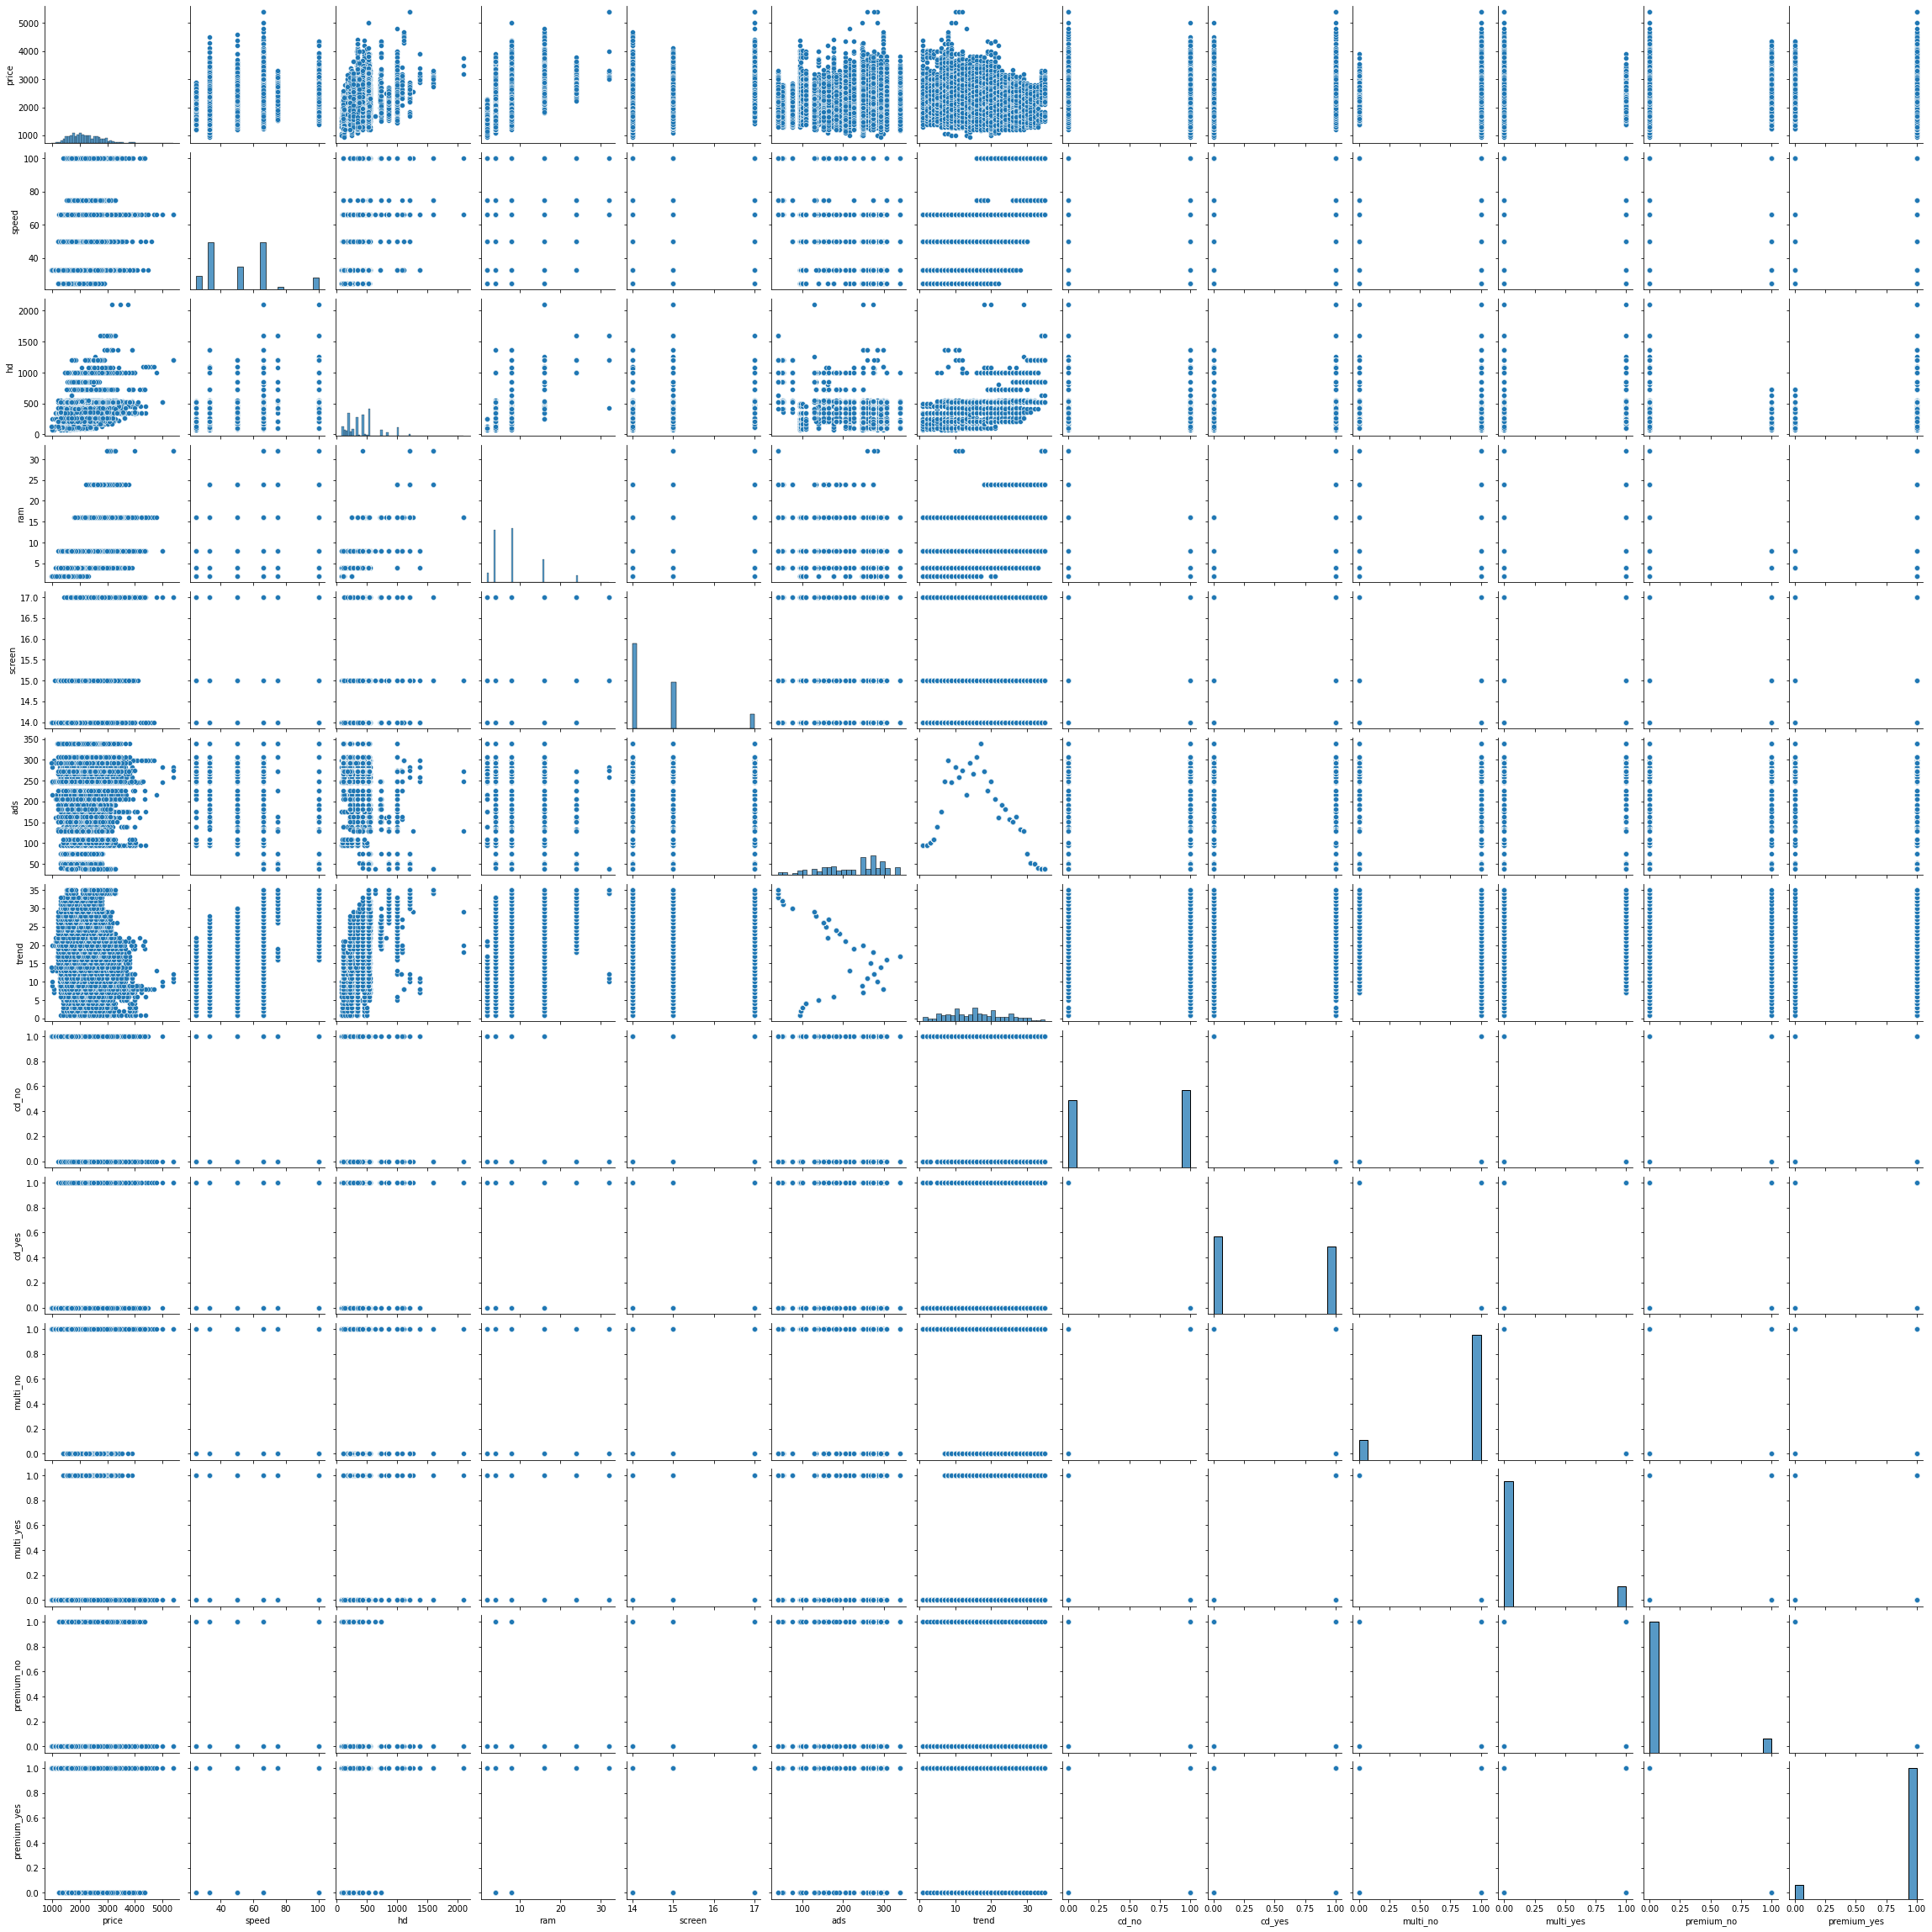

In [14]:
##plotting suing pairplot#
sns.pairplot(computer)

In [15]:
model_train = smf.ols('price ~ speed + hd + ram + screen + ads + trend + cd_no + cd_yes + multi_no + multi_yes + premium_no + premium_yes', data = computer).fit()
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     2400.
Date:                Wed, 31 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:07:21   Log-Likelihood:                -44031.
No. Observations:                6258   AIC:                         8.808e+04
Df Residuals:                    6248   BIC:                         8.815e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      55.0905     23.863      2.309      0.021       8.311     101.870
speed           9.3172      0.185     50.356      0.000       8.954       9.680
hd              0.7815      0.028     28.305      0.000       0.727       0.836
ram            48.2563      1.066     45.275      0.000      46.167      50.346
screen        123.0661      3.999     30.777      0.000     115.227     130.905
ads             0.6541      0.051     12.744      0.000       0.554       0.755
trend         -51.8719      0.629    -82.508      0.000     -53.104     -50.639
cd_no          -2.9622     12.300     -0.241      0.810     -27.075      21.151
cd_yes         58.0526     13.367      4.343      0.000      31.849      84.257
multi_no      -24.5970     13.133     -1.873      0.061     -50.343       1.149
multi_yes      79.6875     13.317      5.984      0.000      53.582     105.793
premium_no    282.1344     14.192     19.880      0.000     254.314     309.955
premium_yes  -227.0440     12.627    -17.980      0.000    -251.798    -202.290
==============================================================================
Omnibus:                     1015.041   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3193.084
Skew:                           0.832   Prob(JB):                         0.00
Kurtosis:                       6.079   Cond. No.                     2.93e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.02e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [17]:
##prediction#
pred=model_train.predict(computer)

In [18]:
#error#
resid = pred-computer.price

In [19]:
##rmse value for price#
rmse= np.sqrt(np.mean(resid*resid))
rmse

275.0726626164152

In [20]:
##to overcome the issue lasso and ridge method is used#
##lasso #
from sklearn.linear_model import Lasso

In [23]:
lasso=Lasso(alpha=0.13,normalize= True)


In [24]:
lasso.fit(computer.iloc[:,1:],computer.price)

C:\Users\Rakesh\.conda\envs\spyder-cf\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Lasso(alpha=0.13, normalize=True)

In [25]:
##coefficient value for all independent value#
lasso.coef_
lasso.intercept_

105.07180626841455

<BarContainer object of 12 artists>

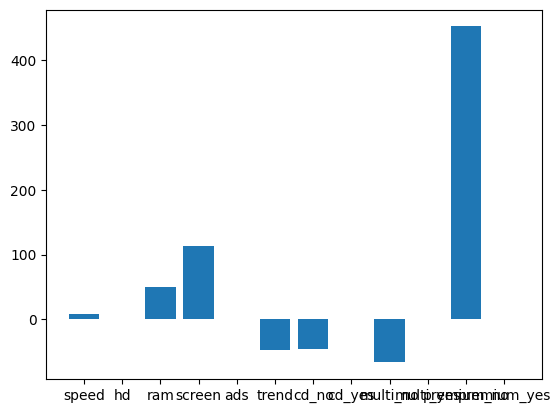

In [26]:
##barplottin#
plt.bar(height=pd.Series(lasso.coef_), x=pd.Series(computer.columns[1:]))

In [27]:
lasso.alpha

0.13

In [28]:
pred_lasso =lasso.predict(computer.iloc[:,1:])

In [29]:
##adjusted R sqre#
lasso.score(computer.iloc[:,1:],computer.price)

0.7716621247946088

In [30]:
##RMSE#
np.sqrt(np.mean((pred_lasso-computer.price)**2))

277.50136164091697

In [31]:
##ridge regression#
from sklearn.linear_model import Ridge

In [32]:
rm= Ridge(alpha=0.4, normalize= True)

In [33]:
rm.fit(computer.iloc[:,1:],computer.price)

C:\Users\Rakesh\.conda\envs\spyder-cf\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


Ridge(alpha=0.4, normalize=True)

In [35]:
##coeefficient value for all independent variable#
rm.coef_
rm.intercept_

495.65484597933187

<BarContainer object of 12 artists>

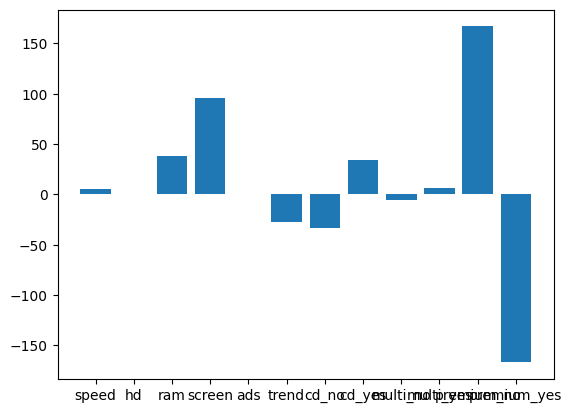

In [36]:
##barplottin#
plt.bar(height=pd.Series(rm.coef_), x=pd.Series(computer.columns[1:]))

In [37]:
rm.alpha

0.4

In [38]:
pred_rm = rm.predict(computer.iloc[:,1:])

In [39]:
##Adjusted Rsquare#
rm.score((computer.iloc[:,1:]),computer.price)

0.682706202018095

In [40]:
##RMSE#
np.sqrt(np.mean((pred_rm-computer.price)**2))

327.11987556813534

In [41]:
##elastic net regression#
from sklearn.linear_model import ElasticNet

In [43]:
enet=ElasticNet(alpha=0.4)

In [44]:
enet.fit(computer.iloc[:,1:],computer.price)

ElasticNet(alpha=0.4)

In [45]:
##coefficient values#
enet.coef_
enet.intercept_


288.39470388774953

<BarContainer object of 12 artists>

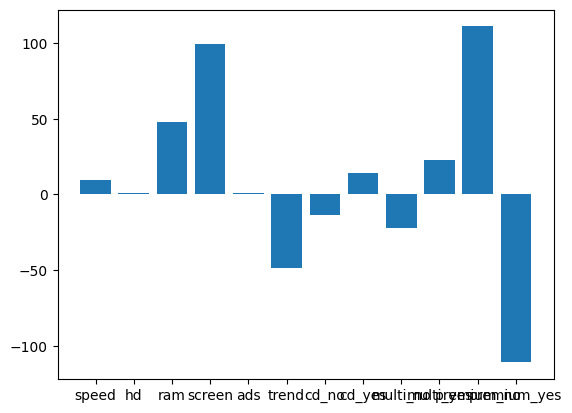

In [47]:
plt.bar(height = pd.Series(enet.coef_), x = pd.Series(computer.columns[1:]))


In [48]:
enet.alpha

0.4

In [52]:
pred_enet=enet.predict(computer.iloc[:, 1:])

In [53]:
##adjusted r square#
enet.score(computer.iloc[:, 1:],computer.price)

0.7539115264100691

In [54]:
##rmse#
np.sqrt(np.mean((pred_enet-computer.price)))

2.38685117562774e-07

In [55]:
##lasso regression#
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [56]:
lasso = Lasso()

In [57]:
parameters = {'alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5 ,10, 20]}

In [58]:
lasso_reg = GridSearchCV(lasso,parameters,scoring='r2',cv=5)
lasso_reg.fit(computer.iloc[:, 1:],computer.price)

C:\Users\Rakesh\.conda\envs\spyder-cf\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.529e+08, tolerance: 1.597e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rakesh\.conda\envs\spyder-cf\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.802e+08, tolerance: 1.644e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rakesh\.conda\envs\spyder-cf\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='r2')

In [59]:
lasso_reg.best_params_
lasso_reg.best_score_

0.6809092862086471

In [61]:
lasso_pred = lasso_reg.predict(computer.iloc[:, 1:])

In [62]:
##adjusted r sqaure#
lasso_reg.score(computer.iloc[:, 1:],computer.price)

0.7756414637813385

In [63]:
##RMSE#
np.sqrt(np.mean((lasso_pred-computer.price)**2))

275.0726679274141

In [64]:
##Ridge Regression#
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [66]:
ridge = Ridge()

In [67]:
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5 ,10, 20]}

In [68]:
ridge_reg = GridSearchCV(ridge,parameters,scoring='r2',cv=5)
ridge_reg.fit(computer.iloc[:, 1:],computer.price)

C:\Users\Rakesh\.conda\envs\spyder-cf\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.34294e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\Rakesh\.conda\envs\spyder-cf\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.37286e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\Rakesh\.conda\envs\spyder-cf\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.2908e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\Rakesh\.conda\envs\spyder-cf\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.60902e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\Rakesh\.conda\envs\spyde

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='r2')

In [69]:
ridge_reg.best_params_
ridge_reg.best_score_

0.681170123938762

In [70]:
ridge_pred=ridge_reg.predict(computer.iloc[:, 1:])

In [71]:
##adjusted R squre#
ridge_reg.score(computer.iloc[:, 1:],computer.price)

0.7756153673297871

In [74]:
##Rmse#
np.sqrt(np.mean((ridge_pred-computer.price)**2))

275.08866511643083

In [75]:
##Elastinet Regression#
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet


In [76]:
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5 ,10, 20]}

In [79]:
enet_reg=GridSearchCV(enet,parameters,scoring="neg_mean_squared_error",cv=5)
enet_reg.fit(computer.iloc[:, 1:],computer.price)

C:\Users\Rakesh\.conda\envs\spyder-cf\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.529e+08, tolerance: 1.597e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rakesh\.conda\envs\spyder-cf\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.802e+08, tolerance: 1.644e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rakesh\.conda\envs\spyder-cf\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

GridSearchCV(cv=5, estimator=ElasticNet(alpha=0.4),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [80]:
enet_reg.best_params_
enet_reg.best_score_

-98401.60736523198

In [82]:
enet_pred=enet_reg.predict(computer.iloc[:, 1:])

In [83]:
##adjusted Rsquaree#
enet_reg.score(computer.iloc[:, 1:],computer.price)

-75686.2579022685

In [87]:
##rmse#
np.sqrt(np.mean((enet_pred - computer.price)**2))

275.1113554586006

PROBLEM 2##

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

In [2]:
##loading the dataset#
car = pd.read_csv('D:\\DATA SCIENCE ASSIGNMENT\\Datasets_LassoRidge\\ToyotaCorolla.csv', encoding='ISO-8859-1')

In [3]:
car.head()

Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ... Central_Lock  \
0         10      2002  46986    Diesel  90          1  ...            1   
1         10      2002  72937    Diesel  90          1  ...            1   
2          9      2002  41711    Diesel  90          1  ...            0   
3          7      2002  48000    Diesel  90          0  ...            0   
4          3      2002  38500    Diesel  90          0  ...            1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                1               1      0          0            0   
1                0               1      0          0            0   
2                0               1      0          0            0   
3                0               1      0          0            0   
4                1               1      0          1            0   

   Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0                 1             0               0        0  
1                 1             0               0        0  
2                 1             0               0        0  
3                 1             0               0        0  
4                 1             0               0        0  

[5 rows x 38 columns]

In [4]:
car.tail()

Id                                              Model  Price  \
1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04  Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  ...  \
1431         69         12      1998  20544    Petrol   86          1  ...   
1432         72          9      1998  19000    Petrol   86          0  ...   
1433         71         10      1998  17016    Petrol   86          0  ...   
1434         70         11      1998  16916    Petrol   86          1  ...   
1435         76          5      1998      1    Petrol  110          0  ...   

     Central_Lock  Powered_Windows  Power_Steering  Radio  Mistlamps  \
1431            1                1               1      0          1   
1432            0                0               1      0          0   
1433            0                0               1      0          0   
1434            0                0               0      0          0   
1435            0                0               1      0          0   

      Sport_Model  Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
1431            1                 1             0               0        0  
1432            1                 1             0               0        0  
1433            0                 1             0               0        0  
1434            0                 1             0               0        0  
1435            0                 0             0               0        0  

[5 rows x 38 columns]

In [5]:
car.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [6]:
##selecting the required colum#
car = car.iloc[:,[2,3,6,8,12,13,15,16,17]]

In [7]:
car.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

In [8]:
#EDA#
##correlation matrix#
car.corr()

Price  Age_08_04        KM        HP        cc     Doors  \
Price          1.000000  -0.876590 -0.569960  0.314990  0.126389  0.185326   
Age_08_04     -0.876590   1.000000  0.505672 -0.156622 -0.098084 -0.148359   
KM            -0.569960   0.505672  1.000000 -0.333538  0.102683 -0.036197   
HP             0.314990  -0.156622 -0.333538  1.000000  0.035856  0.092424   
cc             0.126389  -0.098084  0.102683  0.035856  1.000000  0.079903   
Doors          0.185326  -0.148359 -0.036197  0.092424  0.079903  1.000000   
Gears          0.063104  -0.005364  0.015023  0.209477  0.014629 -0.160141   
Quarterly_Tax  0.219197  -0.198431  0.278165 -0.298432  0.306996  0.109363   
Weight         0.581198  -0.470253 -0.028598  0.089614  0.335637  0.302618   

                  Gears  Quarterly_Tax    Weight  
Price          0.063104       0.219197  0.581198  
Age_08_04     -0.005364      -0.198431 -0.470253  
KM             0.015023       0.278165 -0.028598  
HP             0.209477      -0.298432  0.089614  
cc             0.014629       0.306996  0.335637  
Doors         -0.160141       0.109363  0.302618  
Gears          1.000000      -0.005452  0.020613  
Quarterly_Tax -0.005452       1.000000  0.626134  
Weight         0.020613       0.626134  1.000000

In [9]:
car.describe()

Price    Age_08_04             KM           HP           cc  \
count   1436.000000  1436.000000    1436.000000  1436.000000   1436.00000   
mean   10730.824513    55.947075   68533.259749   101.502089   1576.85585   
std     3626.964585    18.599988   37506.448872    14.981080    424.38677   
min     4350.000000     1.000000       1.000000    69.000000   1300.00000   
25%     8450.000000    44.000000   43000.000000    90.000000   1400.00000   
50%     9900.000000    61.000000   63389.500000   110.000000   1600.00000   
75%    11950.000000    70.000000   87020.750000   110.000000   1600.00000   
max    32500.000000    80.000000  243000.000000   192.000000  16000.00000   

             Doors        Gears  Quarterly_Tax      Weight  
count  1436.000000  1436.000000    1436.000000  1436.00000  
mean      4.033426     5.026462      87.122563  1072.45961  
std       0.952677     0.188510      41.128611    52.64112  
min       2.000000     3.000000      19.000000  1000.00000  
25%       3.000000     5.000000      69.000000  1040.00000  
50%       4.000000     5.000000      85.000000  1070.00000  
75%       5.000000     5.000000      85.000000  1085.00000  
max       5.000000     6.000000     283.000000  1615.00000

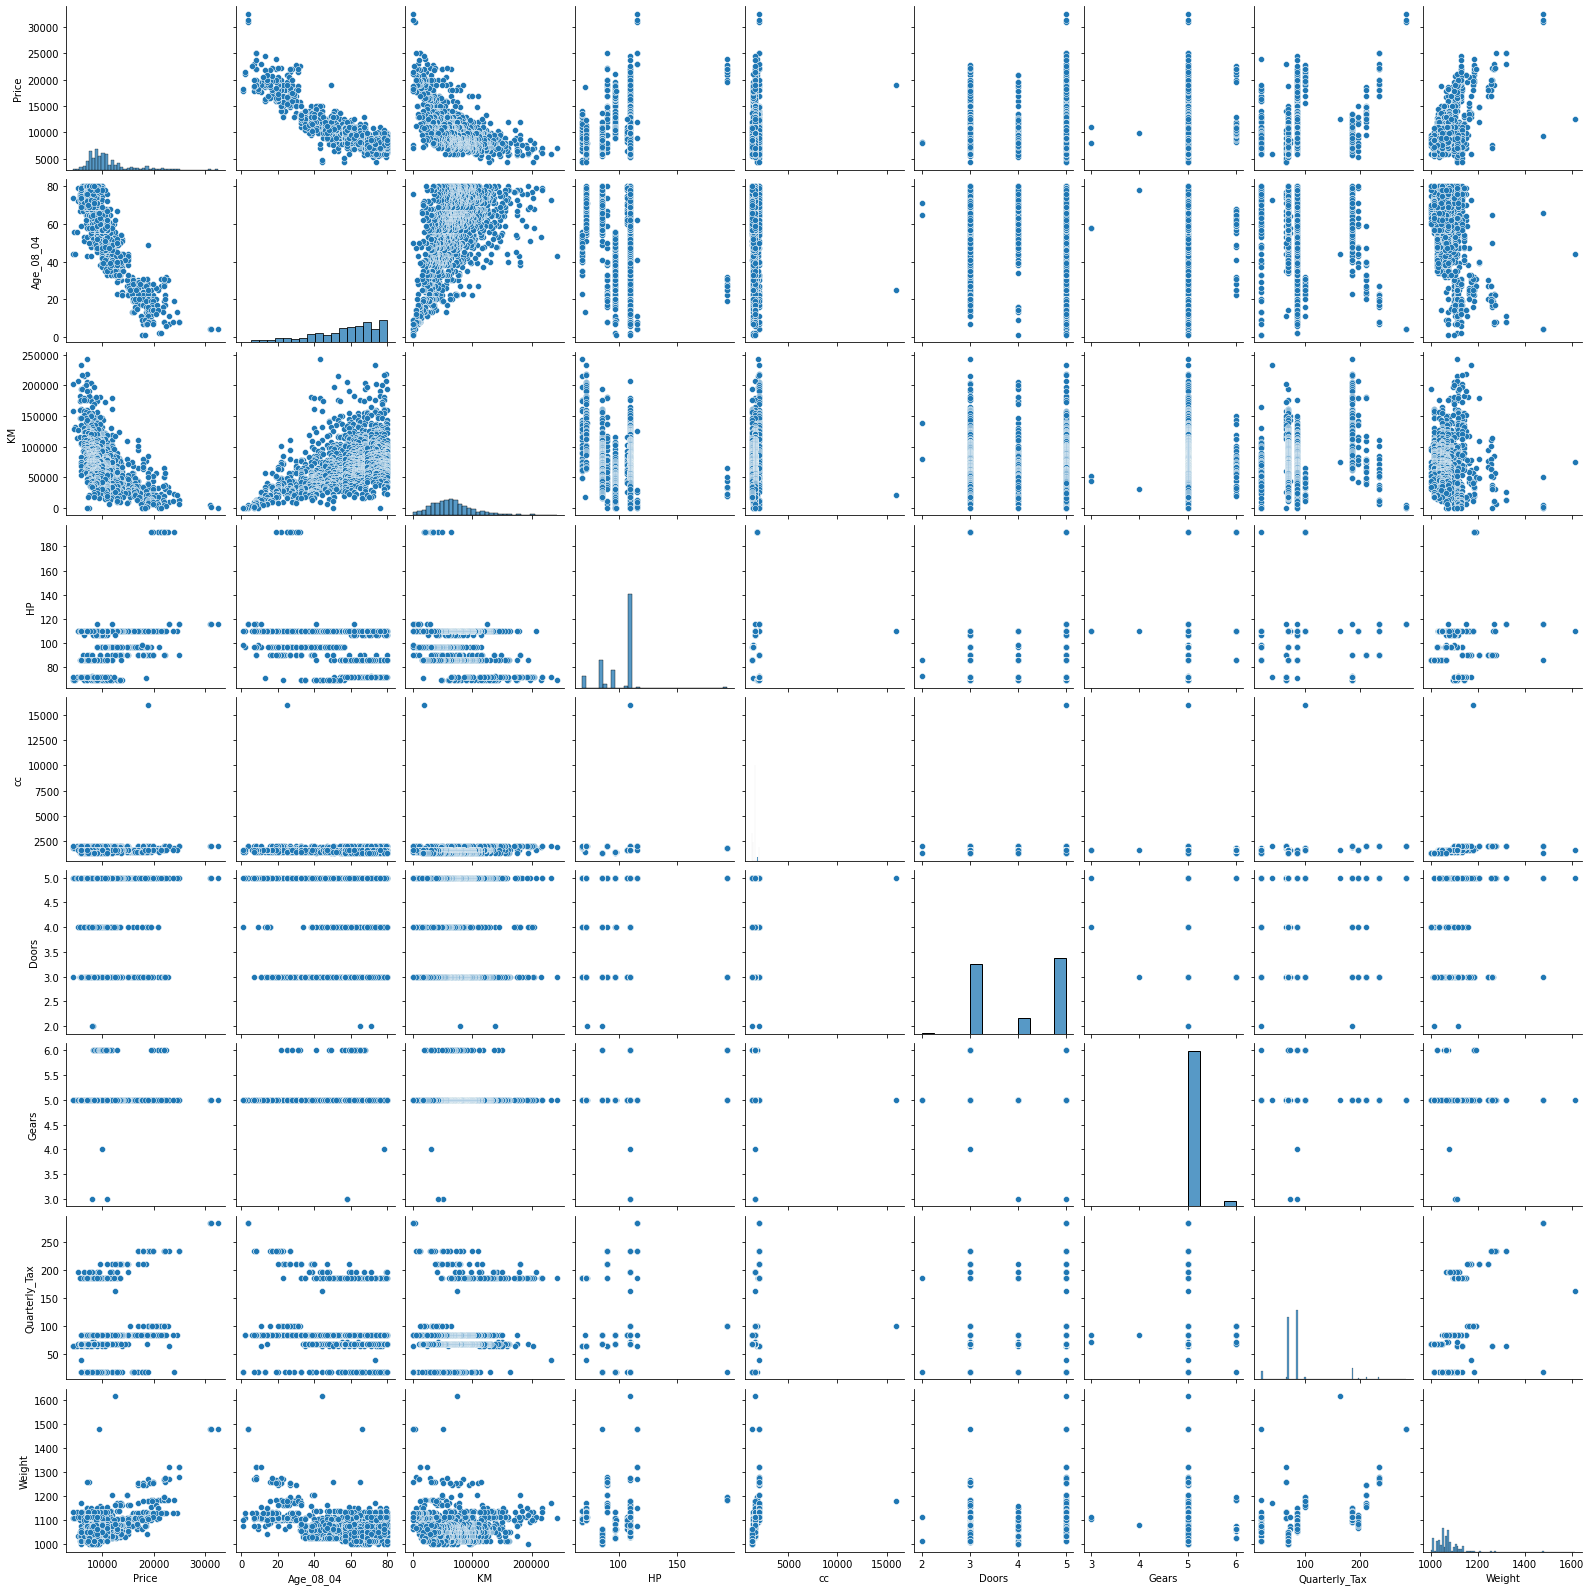

In [10]:
##pairplotting#
sns.pairplot(car)

In [11]:
car.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

In [12]:
#model building on train data##
model_train = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=car).fit()
model_train.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Wed, 31 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:45:17   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
##prediction#
pred = model_train.predict(car)

In [14]:
#error#
resid = pred-car.Price

In [15]:
##rmse value#
rmse= np.sqrt(np.mean(resid*resid))
rmse

1338.2584236201515

In [16]:
##to overcome the issue lasso and ridge method is used#
##lasso #
from sklearn.linear_model import Lasso

In [17]:
lasso=Lasso(alpha=0.3,normalize=True)

In [18]:
lasso.fit(car.iloc[:,1:],car.Price)

C:\Users\Rakesh\.conda\envs\spyder-cf\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Lasso(alpha=0.3, normalize=True)

In [19]:
#coefficient value for independent variable#
lasso.coef_
lasso.intercept_


-5258.401467062722

<BarContainer object of 8 artists>

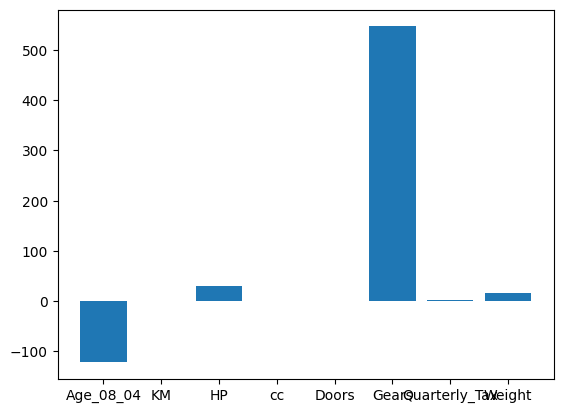

In [20]:
##barplottin#
plt.bar(height=pd.Series(lasso.coef_), x=pd.Series(car.columns[1:]))

In [21]:
lasso.alpha

0.3

In [25]:
pred_lasso=lasso.predict(car.iloc[:,1:])

In [26]:
##adjusted r square#
lasso.score(car.iloc[:,1:],car.Price)

0.8636962845341266

In [27]:
##RMSe#
np.sqrt(np.mean((pred_lasso - car.Price)**2))

1338.584810963262

In [28]:
##Ridge Regression#
from sklearn.linear_model import Ridge

In [29]:
rm=Ridge(alpha=0.4,normalize=True)

In [30]:
rm.fit(car.iloc[:,1:],car.Price)

C:\Users\Rakesh\.conda\envs\spyder-cf\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


Ridge(alpha=0.4, normalize=True)

In [31]:
##coefficient value#
rm.coef_
rm.intercept_


-5515.578137957975

<BarContainer object of 8 artists>

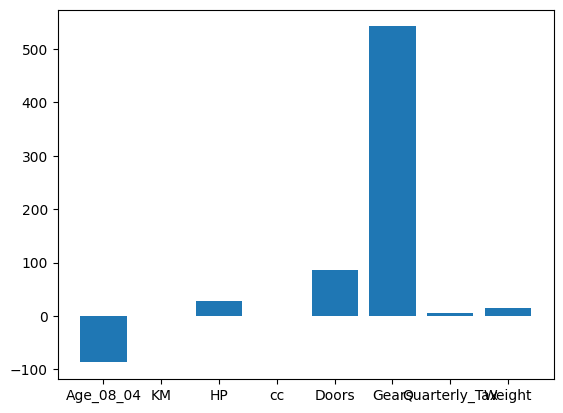

In [32]:
##barplottin#
plt.bar(height=pd.Series(rm.coef_), x=pd.Series(car.columns[1:]))

In [33]:
rm.alpha

0.4

In [34]:
pred_rm =rm.predict(car.iloc[:,1:])

In [35]:
##adjusted R-Square#
rm.score(car.iloc[:,1:],car.Price)

0.8306009245941784

In [37]:
##RMSE#
np.sqrt(np.mean((pred_rm-car.Price)**2))

1492.270533158752

In [40]:
##Elastic Net  Regression#
from sklearn.linear_model import ElasticNet

In [41]:
enet= ElasticNet(alpha=0.4)

In [44]:
enet.fit(car.iloc[:,1:],car.Price)

ElasticNet(alpha=0.4)

In [45]:
##coefficient value#
enet.coef_
enet.intercept_

-3151.2136699845396

<BarContainer object of 8 artists>

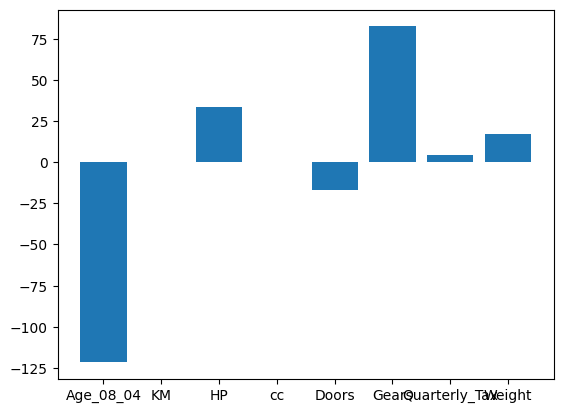

In [46]:
##barplottin#
plt.bar(height=pd.Series(enet.coef_), x=pd.Series(car.columns[1:]))

In [47]:
enet.alpha

0.4

In [48]:
pred_enet=enet.predict(car.iloc[:,1:])

In [50]:
##adjusted R Sqaure#
enet.score(car.iloc[:,1:],car.Price)

0.8631173040588218

In [52]:
##RMSE#
np.sqrt(np.mean((pred_enet-car.Price)**2))

1341.4247673027196

In [53]:
##Laso Regression#
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [54]:
lasso= Lasso()

In [55]:
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5 ,10, 20]}

In [151]:
lasso_reg=GridSearchCV(lasso,parameters,scoring='r2', cv=5)
lasso_reg.fit(car.iloc[:,1:],car.Price)

C:\Users\Rakesh\.conda\envs\spyder-cf\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.117e+08, tolerance: 3.692e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rakesh\.conda\envs\spyder-cf\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.008e+09, tolerance: 1.797e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rakesh\.conda\envs\spyder-cf\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='r2')

In [57]:
lasso_reg.best_params_
lasso_reg.best_score_

0.033617319549919956

In [58]:
lasso_pred= lasso_reg.predict(car.iloc[:,1:])

In [60]:
##adjusted R square#
lasso_reg.score(car.iloc[:,1:],car.Price)

0.8628616158045578

In [61]:
##RMSE#
np.sqrt(np.mean((lasso_pred-car.Price)**2))

1342.6770312748686

In [62]:
##Ridge Regression#
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [63]:
ridge = Ridge()

In [64]:
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5 ,10, 20]}

In [150]:
ridge_reg=GridSearchCV(ridge,parameters,scoring='r2', cv=5)
ridge_reg.fit(car.iloc[:,1:],car.Price)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='r2')

In [66]:
ridge_reg.best_params_
ridge_reg.best_score_

0.033617319549919956

In [67]:
ridge_pred =ridge_reg.predict(car.iloc[:,1:])

In [68]:
##adjusted R square#
ridge_reg.score(car.iloc[:,1:],car.Price)

0.8628616158045578

In [69]:
##RMSE#
np.sqrt(np.mean((ridge_pred-car.Price)**2))

1342.6770312748686

In [70]:
##Elastic regression#
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

In [72]:
enet=ElasticNet()

In [76]:
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5 ,10, 20]}

In [152]:
enet_reg = GridSearchCV(enet, parameters, scoring = 'neg_mean_squared_error', cv = 5)
enet_reg.fit(car.iloc[:, 1:], car.Price)

C:\Users\Rakesh\.conda\envs\spyder-cf\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.117e+08, tolerance: 3.692e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rakesh\.conda\envs\spyder-cf\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.008e+09, tolerance: 1.797e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rakesh\.conda\envs\spyder-cf\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

GridSearchCV(cv=5, estimator=ElasticNet(alpha=0.4),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [80]:
enet_reg.best_params_
enet_reg.best_score_

-3691214.729260399

In [81]:
enet_pred = enet_reg.predict(car.iloc[:,1:])

In [82]:
##adjusted R Square#
enet_reg.score(car.iloc[:,1:],car.Price)

-1801108.3480971702

In [83]:
##Rmse#
np.sqrt(np.mean((enet_pred-car.Price)**2)) 

1342.0537798825985

PROBLEM 3##

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

In [85]:
##LOADING DATASET#
life=pd.read_csv('D:\\DATA SCIENCE ASSIGNMENT\\Datasets_LassoRidge\\Life_expectencey_LR.csv')

In [86]:
life.head()

Country  Year      Status  Life_expectancy  Adult_Mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   infant_deaths  Alcohol  percentage_expenditure  Hepatitis_B  Measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   
3             69     0.01               78.184215         67.0     2787  ...   
4             71     0.01                7.097109         68.0     3013  ...   

   Polio  Total_expenditure  Diphtheria  HIV_AIDS         GDP  Population  \
0    6.0               8.16        65.0       0.1  584.259210  33736494.0   
1   58.0               8.18        62.0       0.1  612.696514    327582.0   
2   62.0               8.13        64.0       0.1  631.744976  31731688.0   
3   67.0               8.52        67.0       0.1  669.959000   3696958.0   
4   68.0               7.87        68.0       0.1   63.537231   2978599.0   

   thinness  thinness_yr  Income_composition  Schooling  
0      17.2         17.3               0.479       10.1  
1      17.5         17.5               0.476       10.0  
2      17.7         17.7               0.470        9.9  
3      17.9         18.0               0.463        9.8  
4      18.2         18.2               0.454        9.5  

[5 rows x 22 columns]

In [87]:
life.tail()

Country  Year      Status  Life_expectancy  Adult_Mortality  \
2933  Zimbabwe  2004  Developing             44.3            723.0   
2934  Zimbabwe  2003  Developing             44.5            715.0   
2935  Zimbabwe  2002  Developing             44.8             73.0   
2936  Zimbabwe  2001  Developing             45.3            686.0   
2937  Zimbabwe  2000  Developing             46.0            665.0   

      infant_deaths  Alcohol  percentage_expenditure  Hepatitis_B  Measles  \
2933             27     4.36                     0.0         68.0       31   
2934             26     4.06                     0.0          7.0      998   
2935             25     4.43                     0.0         73.0      304   
2936             25     1.72                     0.0         76.0      529   
2937             24     1.68                     0.0         79.0     1483   

      ...  Polio  Total_expenditure  Diphtheria  HIV_AIDS         GDP  \
2933  ...   67.0               7.13        65.0      33.6  454.366654   
2934  ...    7.0               6.52        68.0      36.7  453.351155   
2935  ...   73.0               6.53        71.0      39.8   57.348340   
2936  ...   76.0               6.16        75.0      42.1  548.587312   
2937  ...   78.0               7.10        78.0      43.5  547.358878   

      Population  thinness  thinness_yr  Income_composition  Schooling  
2933  12777511.0       9.4          9.4               0.407        9.2  
2934  12633897.0       9.8          9.9               0.418        9.5  
2935    125525.0       1.2          1.3               0.427       10.0  
2936  12366165.0       1.6          1.7               0.427        9.8  
2937  12222251.0      11.0         11.2               0.434        9.8  

[5 rows x 22 columns]

In [88]:
##EDA#
life.isna().sum()

Country                     0
Year                        0
Status                      0
Life_expectancy            10
Adult_Mortality            10
infant_deaths               0
Alcohol                   194
percentage_expenditure      0
Hepatitis_B               553
Measles                     0
BMI                        34
under_five_deaths           0
Polio                      19
Total_expenditure         226
Diphtheria                 19
HIV_AIDS                    0
GDP                       448
Population                652
thinness                   34
thinness_yr                34
Income_composition        167
Schooling                 163
dtype: int64

In [89]:
##dropping Na value#
life = life.dropna()

In [91]:
life.isna().sum()

Country                   0
Year                      0
Status                    0
Life_expectancy           0
Adult_Mortality           0
infant_deaths             0
Alcohol                   0
percentage_expenditure    0
Hepatitis_B               0
Measles                   0
BMI                       0
under_five_deaths         0
Polio                     0
Total_expenditure         0
Diphtheria                0
HIV_AIDS                  0
GDP                       0
Population                0
thinness                  0
thinness_yr               0
Income_composition        0
Schooling                 0
dtype: int64

In [93]:
##dropping country and status columns as it doesnt add value to analysis#
life = life.drop(['Country','Status'], axis=1)

In [94]:
life.columns

Index(['Year', 'Life_expectancy', 'Adult_Mortality', 'infant_deaths',
       'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'under_five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV_AIDS', 'GDP', 'Population', 'thinness', 'thinness_yr',
       'Income_composition', 'Schooling'],
      dtype='object')

In [96]:
##selecting required column#
life= life.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,0]]

In [97]:
life.columns

Index(['Life_expectancy', 'Adult_Mortality', 'infant_deaths', 'Alcohol',
       'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'under_five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV_AIDS', 'GDP', 'Population', 'thinness', 'thinness_yr',
       'Income_composition', 'Schooling', 'Year'],
      dtype='object')

In [98]:
##correlation matrix#
life.corr()

Life_expectancy  Adult_Mortality  infant_deaths  \
Life_expectancy                1.000000        -0.702523      -0.169074   
Adult_Mortality               -0.702523         1.000000       0.042450   
infant_deaths                 -0.169074         0.042450       1.000000   
Alcohol                        0.402718        -0.175535      -0.106217   
percentage_expenditure         0.409631        -0.237610      -0.090765   
Hepatitis_B                    0.199935        -0.105225      -0.231769   
Measles                       -0.068881        -0.003967       0.532680   
BMI                            0.542042        -0.351542      -0.234425   
under_five_deaths             -0.192265         0.060365       0.996906   
Polio                          0.327294        -0.199853      -0.156929   
Total_expenditure              0.174718        -0.085227      -0.146951   
Diphtheria                     0.341331        -0.191429      -0.161871   
HIV_AIDS                      -0.592236         0.550691       0.007712   
GDP                            0.441322        -0.255035      -0.098092   
Population                    -0.022305        -0.015012       0.671758   
thinness                      -0.457838         0.272230       0.463415   
thinness_yr                   -0.457508         0.286723       0.461908   
Income_composition             0.721083        -0.442203      -0.134754   
Schooling                      0.727630        -0.421171      -0.214372   
Year                           0.050771        -0.037092       0.008029   

                         Alcohol  percentage_expenditure  Hepatitis_B  \
Life_expectancy         0.402718                0.409631     0.199935   
Adult_Mortality        -0.175535               -0.237610    -0.105225   
infant_deaths          -0.106217               -0.090765    -0.231769   
Alcohol                 1.000000                0.417047     0.109889   
percentage_expenditure  0.417047                1.000000     0.016760   
Hepatitis_B             0.109889                0.016760     1.000000   
Measles                -0.050110               -0.063071    -0.124800   
BMI                     0.353396                0.242738     0.143302   
under_five_deaths      -0.101082               -0.092158    -0.240766   
Polio                   0.240315                0.128626     0.463331   
Total_expenditure       0.214885                0.183872     0.113327   
Diphtheria              0.242951                0.134813     0.588990   
HIV_AIDS               -0.027113               -0.095085    -0.094802   
GDP                     0.443433                0.959299     0.041850   
Population             -0.028880               -0.016792    -0.129723   
thinness               -0.403755               -0.255035    -0.129406   
thinness_yr            -0.386208               -0.255635    -0.133251   
Income_composition      0.561074                0.402170     0.184921   
Schooling               0.616975                0.422088     0.215182   
Year                   -0.113365                0.069553     0.114897   

                         Measles       BMI  under_five_deaths     Polio  \
Life_expectancy        -0.068881  0.542042          -0.192265  0.327294   
Adult_Mortality        -0.003967 -0.351542           0.060365 -0.199853   
infant_deaths           0.532680 -0.234425           0.996906 -0.156929   
Alcohol                -0.050110  0.353396          -0.101082  0.240315   
percentage_expenditure -0.063071  0.242738          -0.092158  0.128626   
Hepatitis_B            -0.124800  0.143302          -0.240766  0.463331   
Measles                 1.000000 -0.153245           0.517506 -0.057850   
BMI                    -0.153245  1.000000          -0.242137  0.186268   
under_five_deaths       0.517506 -0.242137           1.000000 -0.171164   
Polio                  -0.057850  0.186268          -0.171164  1.000000   
Total_expenditure      -0.113583  0.189469          -0.145803  0.119768   
Diphtheria    

In [99]:
##EDA#
life.describe()

Life_expectancy  Adult_Mortality  infant_deaths      Alcohol  \
count      1649.000000      1649.000000    1649.000000  1649.000000   
mean         69.302304       168.215282      32.553062     4.533196   
std           8.796834       125.310417     120.847190     4.029189   
min          44.000000         1.000000       0.000000     0.010000   
25%          64.400000        77.000000       1.000000     0.810000   
50%          71.700000       148.000000       3.000000     3.790000   
75%          75.000000       227.000000      22.000000     7.340000   
max          89.000000       723.000000    1600.000000    17.870000   

       percentage_expenditure  Hepatitis_B        Measles          BMI  \
count             1649.000000  1649.000000    1649.000000  1649.000000   
mean               698.973558    79.217708    2224.494239    38.128623   
std               1759.229336    25.604664   10085.802019    19.754249   
min                  0.000000     2.000000       0.000000     2.000000   
25%                 37.438577    74.000000       0.000000    19.500000   
50%                145.102253    89.000000      15.000000    43.700000   
75%                509.389994    96.000000     373.000000    55.800000   
max              18961.348600    99.000000  131441.000000    77.100000   

       under_five_deaths        Polio  Total_expenditure   Diphtheria  \
count        1649.000000  1649.000000        1649.000000  1649.000000   
mean           44.220133    83.564585           5.955925    84.155246   
std           162.897999    22.450557           2.299385    21.579193   
min             0.000000     3.000000           0.740000     2.000000   
25%             1.000000    81.000000           4.410000    82.000000   
50%             4.000000    93.000000           5.840000    92.000000   
75%            29.000000    97.000000           7.470000    97.000000   
max          2100.000000    99.000000          14.390000    99.000000   

          HIV_AIDS            GDP    Population     thinness  thinness_yr  \
count  1649.000000    1649.000000  1.649000e+03  1649.000000  1649.000000   
mean      1.983869    5566.031887  1.465363e+07     4.850637     4.907762   
std       6.032360   11475.900117  7.046039e+07     4.599228     4.653757   
min       0.100000       1.681350  3.400000e+01     0.100000     0.100000   
25%       0.100000     462.149650  1.918970e+05     1.600000     1.700000   
50%       0.100000    1592.572182  1.419631e+06     3.000000     3.200000   
75%       0.700000    4718.512910  7.658972e+06     7.100000     7.100000   
max      50.600000  119172.741800  1.293859e+09    27.200000    28.200000   

       Income_composition    Schooling         Year  
count         1649.000000  1649.000000  1649.000000  
mean             0.631551    12.119891  2007.840509  
std              0.183089     2.795388     4.087711  
min              0.000000     4.200000  2000.000000  
25%              0.509000    10.300000  2005.000000  
50%              0.673000    12.300000  2008.000000  
75%              0.751000    14.000000  2011.000000  
max              0.936000    20.700000  2015.000000

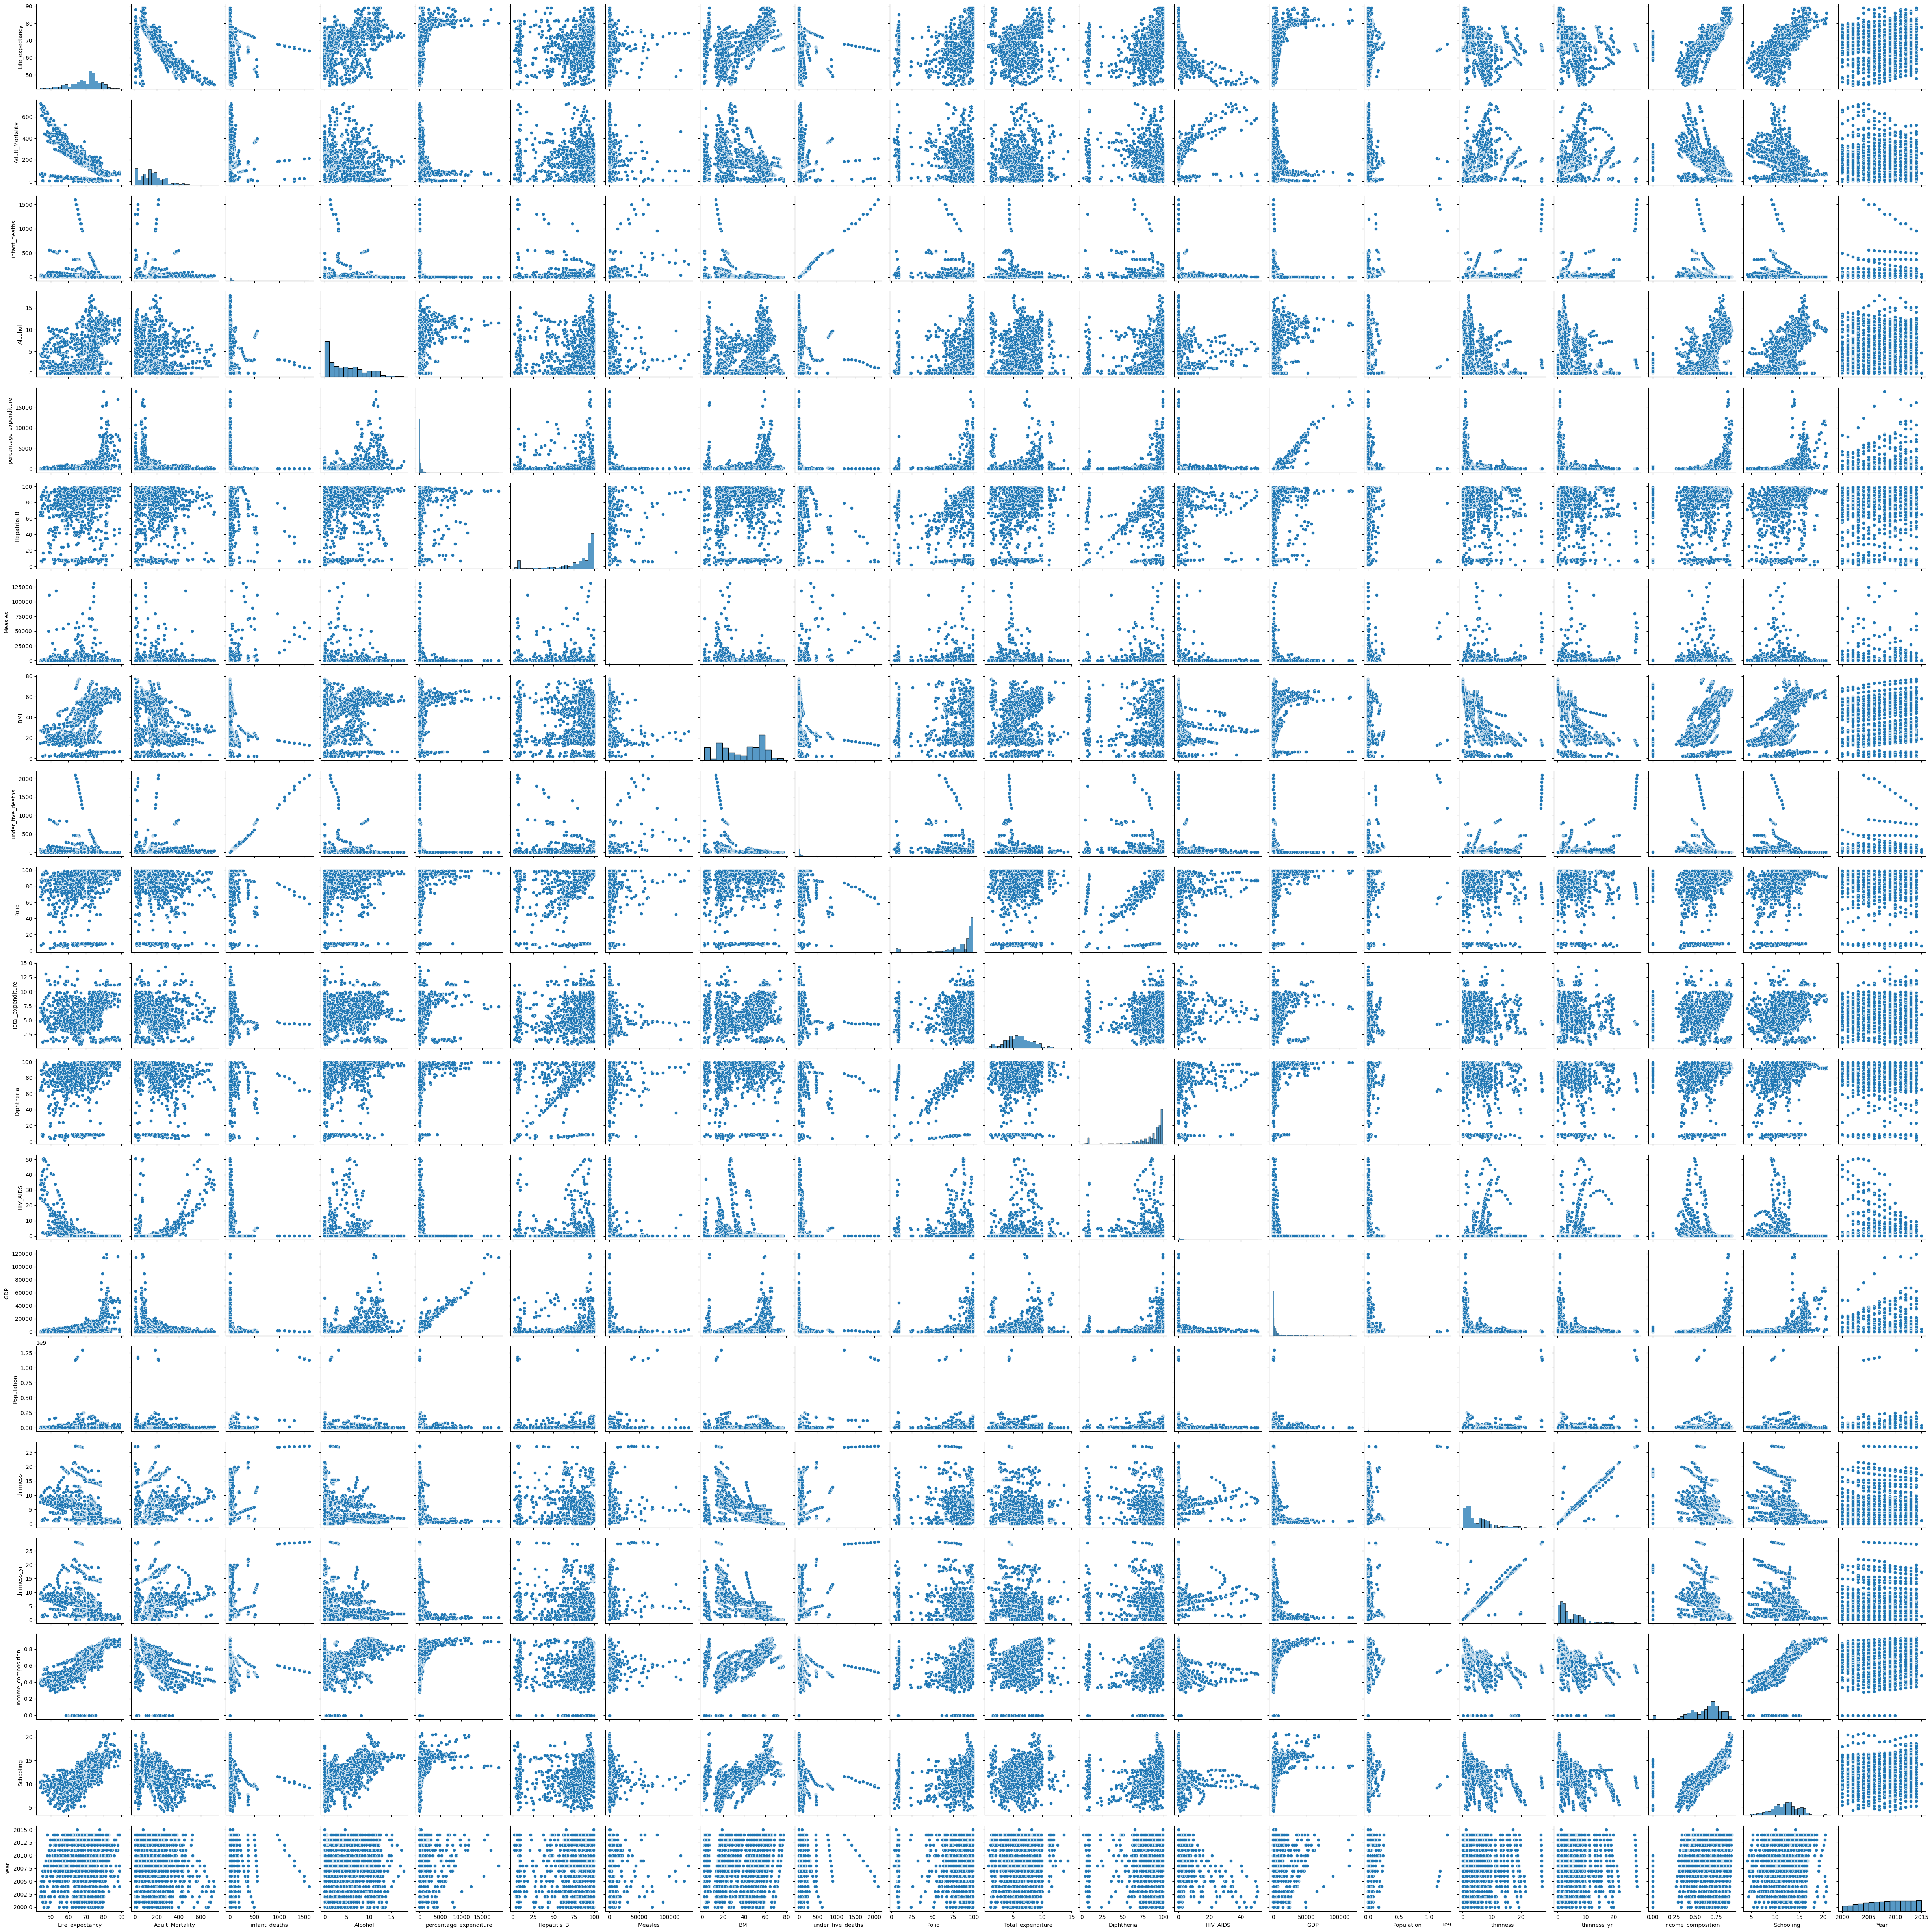

In [100]:
##pairplotting#
sns.pairplot(life)

In [101]:
life.columns

Index(['Life_expectancy', 'Adult_Mortality', 'infant_deaths', 'Alcohol',
       'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'under_five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV_AIDS', 'GDP', 'Population', 'thinness', 'thinness_yr',
       'Income_composition', 'Schooling', 'Year'],
      dtype='object')

In [102]:
##preparing model on train data#
model_train= smf.ols('Life_expectancy~Adult_Mortality+infant_deaths+Alcohol+percentage_expenditure+Hepatitis_B+Measles+BMI+under_five_deaths+Polio+Total_expenditure+Diphtheria+HIV_AIDS+GDP+Population+thinness+thinness_yr+Income_composition+Schooling+Year',data=life).fit()
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     443.1
Date:                Wed, 31 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:06:12   Log-Likelihood:                -4424.8
No. Observations:                1649   AIC:                             8890.
Df Residuals:                    1629   BIC:                             8998.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                313.3528     46.266      6.773      0.000     222.606     404.100
Adult_Mortality           -0.0164      0.001    -17.449      0.000      -0.018      -0.015
infant_deaths              0.0888      0.011      8.368      0.000       0.068       0.110
Alcohol                   -0.0983      0.031     -3.139      0.002      -0.160      -0.037
percentage_expenditure     0.0003      0.000      1.734      0.083   -4.08e-05       0.001
Hepatitis_B               -0.0023      0.004     -0.524      0.600      -0.011       0.006
Measles                -1.107e-05   1.07e-05     -1.033      0.302   -3.21e-05    9.95e-06
BMI                        0.0316      0.006      5.290      0.000       0.020       0.043
under_five_deaths         -0.0666      0.008     -8.671      0.000      -0.082      -0.052
Polio                      0.0057      0.005      1.104      0.270      -0.004       0.016
Total_expenditure          0.0961      0.040      2.375      0.018       0.017       0.175
Diphtheria                 0.0135      0.006      2.301      0.022       0.002       0.025
HIV_AIDS                  -0.4495      0.018    -25.222      0.000      -0.484      -0.415
GDP                      2.95e-05   2.83e-05      1.044      0.297   -2.59e-05    8.49e-05
Population             -6.527e-10   1.74e-09     -0.376      0.707   -4.06e-09    2.75e-09
thinness                  -0.0023      0.053     -0.043      0.965      -0.105       0.101
thinness_yr               -0.0531      0.052     -1.023      0.307      -0.155       0.049
Income_composition        10.4701      0.834     12.551      0.000       8.834      12.106
Schooling                  0.9063      0.059     15.348      0.000       0.790       1.022
Year                      -0.1299      0.023     -5.622      0.000      -0.175      -0.085
==============================================================================
Omnibus:                       34.044   Durbin-Watson:                   0.715
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.019
Skew:                          -0.098   Prob(JB):                     7.61e-15
Kurtosis:                       3.953   Cond. No.                     3.79e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.79e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [103]:
##prediction#
pred = model_train.predict(life)

In [104]:
##error#
resid = pred-life.Life_expectancy

In [105]:
#rmse value#
rmse=np.sqrt(np.mean(resid*resid))
rmse

3.5408604162649673

In [106]:
# To overcome the issues, LASSO and RIDGE regression are used
################
###LASSO MODEL###
from sklearn.linear_model import Lasso

In [107]:
lasso =Lasso(alpha=0.13,normalize=True)

In [108]:
lasso.fit(life.iloc[:,1:],life.Life_expectancy)

C:\Users\Rakesh\.conda\envs\spyder-cf\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Lasso(alpha=0.13, normalize=True)

In [109]:
##coefficient value#
lasso.coef_
lasso.intercept_


65.92985261954466

<BarContainer object of 19 artists>

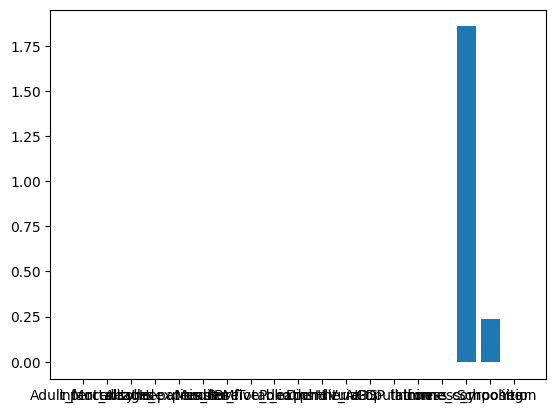

In [111]:
##barplottin#
plt.bar(height=pd.Series(lasso.coef_), x=pd.Series(life.columns[1:]))

In [112]:
lasso.alpha

0.13

In [115]:
pred_lasso = lasso.predict(life.iloc[:,1:])

In [116]:
##adjusted R square#
lasso.score(life.iloc[:,1:],life.Life_expectancy)

0.21992595914327662

In [117]:
##rmse #
np.sqrt(np.mean((pred_lasso-life.Life_expectancy)**2))

7.767166092080499

In [118]:
##Ridge Regression#
from sklearn.linear_model import Ridge

In [119]:
rm= Ridge(alpha=0.4,normalize=True)

In [120]:
rm.fit(life.iloc[:,1:],life.Life_expectancy)

C:\Users\Rakesh\.conda\envs\spyder-cf\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


Ridge(alpha=0.4, normalize=True)

In [121]:
#coefficient value#
rm.coef_
rm.intercept_


169.5909753552131

<BarContainer object of 19 artists>

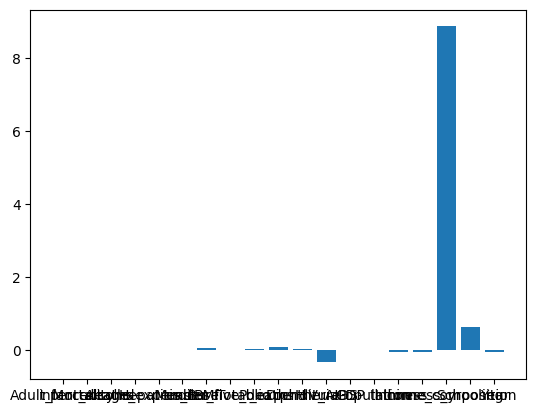

In [122]:
##barplottin#
plt.bar(height=pd.Series(rm.coef_), x=pd.Series(life.columns[1:]))

In [123]:
rm.alpha

0.4

In [124]:
pred_rm= rm.predict(life.iloc[:,1:])

In [125]:
##adjusted R square#
rm.score(life.iloc[:,1:],life.Life_expectancy)

0.8115183167025664

In [126]:
##Rmse#
np.sqrt(np.mean((pred_rm-life.Life_expectancy)**2))

3.81794137209119

In [127]:
##Elastic Net Regression#
from sklearn.linear_model import ElasticNet

In [128]:
enet=ElasticNet(alpha=0.4)

In [129]:
enet.fit(life.iloc[:,1:],life.Life_expectancy)

C:\Users\Rakesh\.conda\envs\spyder-cf\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.226e+04, tolerance: 1.275e+01
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.4)

In [130]:
##coeefficient value#
enet.coef_
enet.intercept_

187.2930002352628

<BarContainer object of 19 artists>

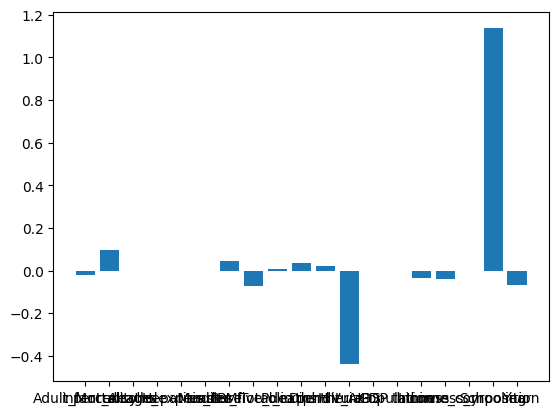

In [131]:
##barplottin#
plt.bar(height=pd.Series(enet.coef_), x=pd.Series(life.columns[1:]))

In [132]:
enet.alpha

0.4

In [133]:
pred_enet= enet.predict(life.iloc[:,1:])

In [134]:
##adjusted R Square#
enet.score(life.iloc[:,1:], life.Life_expectancy)

0.8213070771111706

In [136]:
##rmse#
np.sqrt(np.mean((pred_enet-life.Life_expectancy)**2))

3.7174775595457614

In [137]:
##Lasso regression#
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [138]:
lasso=Lasso()

In [139]:
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5 ,10, 20]}

In [141]:
lasso_reg=GridSearchCV(lasso,parameters,scoring='r2',cv=5)
lasso_reg.fit(life.iloc[:,1:], life.Life_expectancy)

C:\Users\Rakesh\.conda\envs\spyder-cf\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.094e+03, tolerance: 9.853e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rakesh\.conda\envs\spyder-cf\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.170e+03, tolerance: 1.045e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rakesh\.conda\envs\spyder-cf\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

C:\Users\Rakesh\.conda\envs\spyder-cf\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.592e+03, tolerance: 1.101e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rakesh\.conda\envs\spyder-cf\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.003e+03, tolerance: 9.796e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rakesh\.conda\envs\spyder-cf\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='r2')

In [142]:
lasso_reg.best_params_
lasso_reg.best_score_


0.7983761925456202

In [143]:
lasso_pred=lasso_reg.predict(life.iloc[:,1:])

In [144]:
##adjusted R Square#
lasso_reg.score(life.iloc[:,1:],life.Life_expectancy)

0.8378816171310352

In [146]:
#rmse#
np.sqrt(np.mean((lasso_pred-life.Life_expectancy)**2))

3.540876754577581

In [147]:
##Ridge Regression#
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge


In [148]:
ridge=Ridge()

In [149]:
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5 ,10, 20]}

In [154]:
ridge_reg= GridSearchCV(ridge, parameters,scoring='r2',cv=5)
ridge_reg.fit(life.iloc[:,1:],life.Life_expectancy)

C:\Users\Rakesh\.conda\envs\spyder-cf\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.6911e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\Rakesh\.conda\envs\spyder-cf\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.9491e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\Rakesh\.conda\envs\spyder-cf\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.23048e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\Rakesh\.conda\envs\spyder-cf\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.10356e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\Rakesh\.conda\envs\spyder

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='r2')

In [155]:
ridge_reg.best_params_
ridge_reg.best_score_

0.7915546652170024

In [156]:
ridge_pred= ridge_reg.predict(life.iloc[:,1:])

In [157]:
##adjusted R Sqaure#
ridge_reg.score(life.iloc[:,1:],life.Life_expectancy)

0.8378831132207849

In [158]:
#rmse value#
np.sqrt(np.mean((ridge_pred-life.Life_expectancy)**2))

3.5408604162649677

In [159]:
##Elastic Net Regression#
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet


In [160]:
enet=ElasticNet()

In [161]:
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5 ,10, 20]}

In [162]:
enet_reg =GridSearchCV(enet,parameters,scoring='neg_mean_squared_error', cv=5)
enet_reg.fit(life.iloc[:,1:],life.Life_expectancy)

C:\Users\Rakesh\.conda\envs\spyder-cf\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.094e+03, tolerance: 9.853e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rakesh\.conda\envs\spyder-cf\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.170e+03, tolerance: 1.045e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rakesh\.conda\envs\spyder-cf\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

C:\Users\Rakesh\.conda\envs\spyder-cf\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.718e+03, tolerance: 1.101e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rakesh\.conda\envs\spyder-cf\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.168e+03, tolerance: 9.796e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rakesh\.conda\envs\spyder-cf\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [163]:
enet_reg.best_params_
enet_reg.best_score_

-14.812637292769798

In [164]:
enet_pred=enet_reg.predict(life.iloc[:,1:])

In [167]:
##adjusted R square#
enet_reg.score(life.iloc[:,1:],life.Life_expectancy)

-12.53772998477121

In [168]:
#rmse#
np.sqrt(np.mean((enet_pred-life.Life_expectancy)**2))

3.5408657112027293

#####################################################